In [1]:
import pandas as pd

In [26]:
A=pd.read_csv("E:/Data Science class/Datasets/50_StartupsFinal.csv")

# DATA PROFILE


In [27]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [29]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [30]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# EDA

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(0.5,1,'RND VS PROFIT')

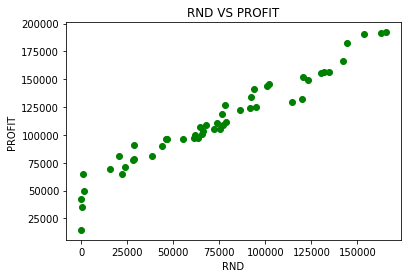

In [32]:
plt.scatter(A.RND,A.PROFIT,c="green")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND VS PROFIT")

Text(0.5,1,'RND VS ADMIN')

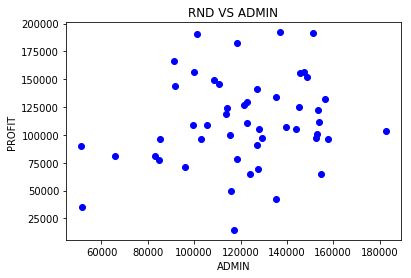

In [34]:
plt.scatter(A.ADMIN,A.PROFIT,c="blue")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.title("RND VS ADMIN")

Text(0.5,1,'MKT VS PROFIT')

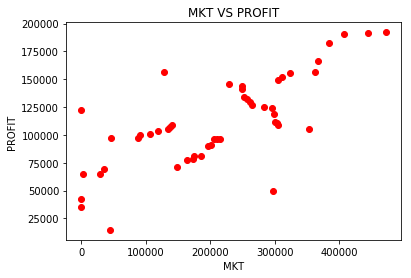

In [35]:
plt.scatter(A.MKT,A.PROFIT,c="red")
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.title("MKT VS PROFIT")

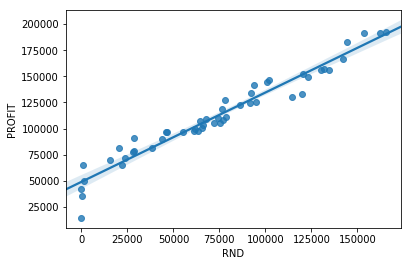

In [36]:
sb.regplot(A.RND,A.PROFIT)

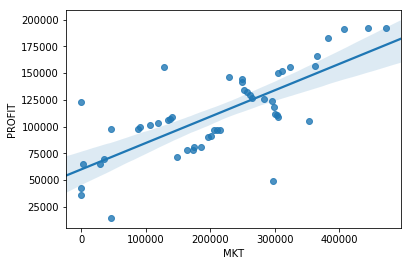

In [37]:
sb.regplot(A.MKT,A.PROFIT)

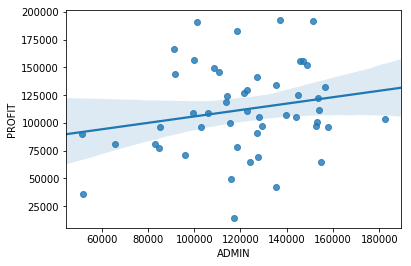

In [38]:
sb.regplot(A.ADMIN,A.PROFIT)

In [39]:
A.shape

(50, 5)

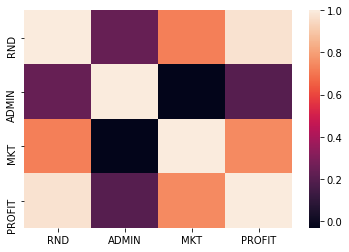

In [40]:
sb.heatmap(A.corr())

# DIVIDE DATA IN TRAINING AND TESTING SET, CHECK FOR DISTRIBUTIONS

In [41]:
X=A[['RND']]
Y=A[['PROFIT']]

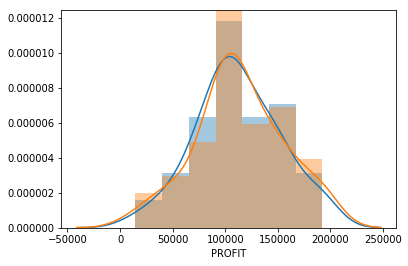

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
sb.distplot(A.PROFIT)
sb.distplot(ytrain)

# TRAIN THE MODEL

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(xtrain,ytrain)

In [77]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
xtrain

,RND
1,162597.70
24,77044.01
13,91992.39
5,131876.90
6,134615.46
3,144372.41
27,72107.60
10,101913.08
22,73994.56
35,46014.02


# FETCH THE VALUES OF INTERCEPT(b0) and SLOPE (b1)

In [79]:
ytrain

,PROFIT
1,191792.06
24,108552.04
13,134307.35
5,156991.12
6,156122.51
3,182901.99
27,105008.31
10,146121.95
22,110352.25
35,96479.51


In [80]:
b1 = model.coef_
b0 = model.intercept_

# MAKE PREDICTIONS BASED ON TEST DATA

In [81]:
pred = model.predict(xtest)

# CALCULATE OVERALL MODEL ERROR

In [82]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

7706.492711737046

In [83]:
b0

array([47953.34217867])

In [84]:
b1

array([[0.87645492]])

# PLOT REGRESSION

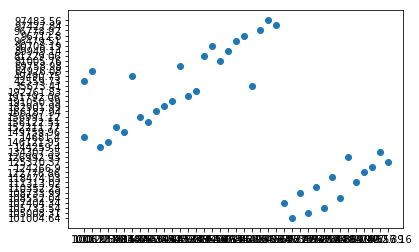

In [85]:
plt.scatter(xtrain,ytrain)

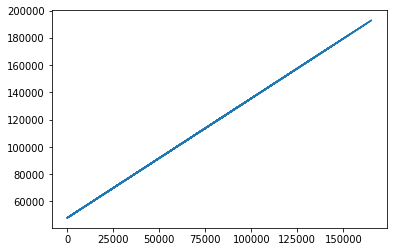

In [86]:
plt.plot(xtrain,b0+b1*xtrain)

# PLOT RESIDUALS

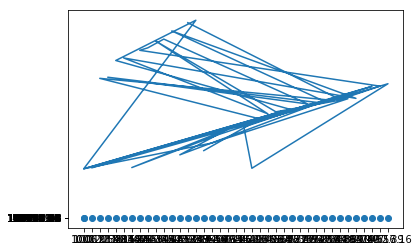

In [87]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,b0+(b1*xtrain))

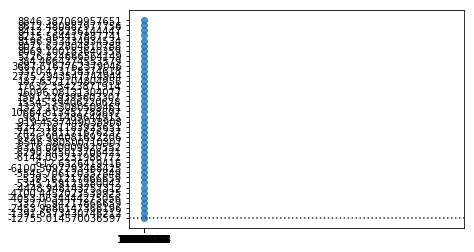

In [71]:
sb.residplot(xtrain,ytrain)